In [1]:
%matplotlib inline

# Getting a Video Stream


You can read a vidoe frame by frame from a file or from a camera connected to your computer. To do so, you have to instantiate `cv2.VideoCapture`. In case you give it a path to a movie file it reads frames from a file. Otherwise, if you pass an integer it grabs frames from the camera with the corresponding images.

https://docs.opencv.org/master/d0/da7/videoio_overview.html

https://docs.opencv.org/master/d8/dfe/classcv_1_1VideoCapture.html

Grab frames from a file and scale the frames down.

```python
import cv2


cap = cv2.VideoCapture('/path/to/a/movie/file')  

w, h = (640, 400)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, w)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, h)
```

Grab frames from the first camera connected to your computer.

```python
import cv2


cap = cv2.VideoCapture(0)
```    

In [1]:
#!/usr/bin/env python

'''
Retrofying

USAGE:
    retrofyme.py
'''

import cv2
import numpy as np
import scipy.spatial as sp


def _c64_colors():
    # From https://upload.wikimedia.org/wikipedia/commons/6/65/Commodore64_palette.png
    # with Seashore, the 16 C64 colors
    black = [0, 0, 0]
    white = [255, 255, 255]
    red = [154, 76, 67]
    cyan = [122, 194, 200]
    purple = [157, 90, 165]
    green = [103, 171, 95]
    blue = [82, 73, 156]
    yellow = [202, 212, 137]
    a = [156, 103, 58]
    b = [106, 82, 12]
    c = [197, 126, 119]
    d = [99, 99, 99]
    e = [139, 139, 139]
    f = [164, 226, 157]
    g = [139, 130, 205]
    hc = [175, 175, 175]

    c64_colors = [black, white, red, cyan, purple, green, blue, yellow, a, b,
                  c, d, e, f, g, hc]
    return np.array(c64_colors)


def create_tree(colors):
    return sp.cKDTree(colors)


def query_tree(small_image, tree):
    h, w, d = small_image.shape

    small_image_lst = small_image.reshape(h * w, d)
    # get Euclidean distance and index of each C64 color in tree
    _, result = tree.query(small_image_lst)

    for idx, c in enumerate(_c64_colors()):
        small_image_lst[result == idx] = c
    return small_image_lst


if __name__ == '__main__':

    cap = cv2.VideoCapture(0)
    w, h = (1280, 800)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, w)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

    tree = create_tree(_c64_colors())

    while True:
        ret, img = cap.read()
        _ = query_tree(img, tree)

        img_large = cv2.resize(img, (1280, 800),
                               interpolation=cv2.INTER_NEAREST)
        cv2.imshow('Retrofied', img_large)

        if cv2.waitKey(1) == 27:
            break
    cv2.destroyAllWindows()

# Filtering/Smoothing an Image


The following examples and descriptions are adapted from
http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which does not blur the edges too). OpenCV provides mainly four types of blurring techniques.

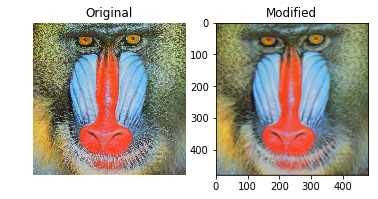

In [14]:
import os
import cv2
import webget
import matplotlib.pyplot as plt


url = 'http://pngnq.sourceforge.net/testimages/mandrill.png'
webget.download(url)

img = cv2.imread(os.path.basename(url))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(img, (5, 5), 5)

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original')
plt.imshow(img, interpolation='none')  # , cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(blur, interpolation='none')  #, cmap=plt.cm.Greys_r)
plt.show()

In [17]:
kernel_x = cv2.getGaussianKernel(5, 0)
print(kernel_x * kernel_x.T)

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


# Thresholds and Binary Images

The following examples and descriptions are adapted from
http://docs.opencv.org/3.1.0/d7/d4d/tutorial_py_thresholding.html

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is `cv2.threshold`. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the `maxVal` which represents the value to be given if pixel value is more than the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function.

[[143 143 142 ...  49  49  48]
 [155 154 153 ...  49  49  49]
 [156 155 154 ...  49  49  49]
 ...
 [254 254 254 ... 252 251 251]
 [254 254 254 ... 252 251 251]
 [254 254 254 ... 252 251 251]]


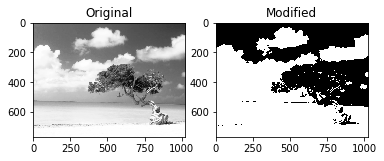

In [18]:
import cv2
import webget
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('./mare-08.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img)
img = cv2.medianBlur(img, 5)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(thresh, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

## Morphological Operations

The following examples and descriptions are adapted from
https://docs.opencv.org/4.1.0/d9/d61/tutorial_py_morphological_ops.html

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation.

### Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object. The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

Here, all the pixels near the boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here is an example of a 5x5 kernel with full of ones and a 3x3 kernel with *cross*.

In [19]:
import cv2
import webget
import numpy as np
import matplotlib.pyplot as plt


webget.download('http://docs.opencv.org/3.1.0/j.png')

img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)


erosion = cv2.erode(img, kernel2, iterations=1)

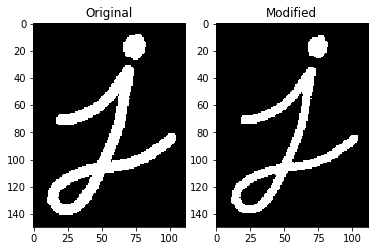

In [20]:
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(erosion, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

### Dilation

It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

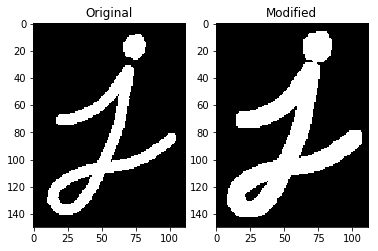

In [21]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)

dilation = cv2.dilate(img, kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(dilation, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

###  Opening

Opening is just another name of *erosion* followed by *dilation*. It is useful in removing noise, as we explained above. Here we use the function, `cv2.morphologyEx()`.

Let's start by generating a bit of noise to distort our image.

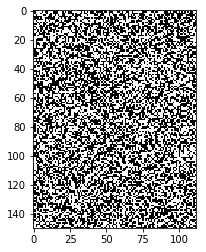

In [22]:
noise = np.random.randint(2, size=112*150)
noise = noise.reshape(150, 112).astype(np.uint8)
plt.imshow(noise, cmap=plt.cm.Greys, interpolation='none')

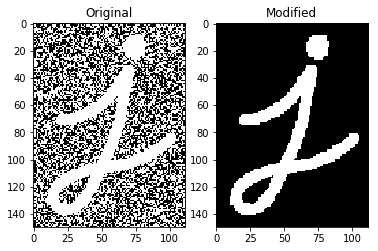

In [23]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)
img = img - noise
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

erosion = cv2.erode(img, kernel, iterations=1)
opening_stepwise = cv2.dilate(erosion, kernel, iterations=1)
assert np.array_equal(opening, opening_stepwise)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(opening, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

### Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

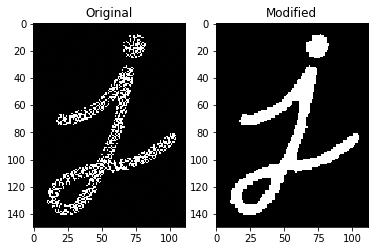

In [24]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)
img = img + noise
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

dilation = cv2.dilate(img, kernel, iterations=1)
closing_stepwise = cv2.erode(dilation, kernel, iterations=1)
assert np.array_equal(closing, closing_stepwise)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(closing_stepwise, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

# An Example

There is a citizen science project *Chimp&See* (https://www.chimpandsee.org/) from the Max Planck Institute for Evolutionary Anthropology, which asks for help on identifying different animals moving through the djungle.
https://www.chimpandsee.org/


Let's see how we can try to help them with a naive implementation of movement detection and tracking, 
see program `movement_detection.py`, e.g., `python movement_detection.py --movie=570d07dd3fc33c0001bee21b.mp4 --area=400 --amp=3`.

This program is inspired by and adapted from 
http://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/

![](./images/movement.gif)

![](./images/movement_fd.gif)

![](./images/movement_thresh.gif)

In [26]:
%%bash
python movement_detection.py --movie=test.mp4 --area=400 --amp=3

{'--amp': '3',
 '--area': '400',
 '--help': False,
 '--movie': 'test.mp4',
 '--version': False}


In [27]:
%%bash
python movement_detection.py --movie=/dev/video0 --area=400 --amp=3

Process is interrupted.


## Exercise

* Study `movement_detection.py`
  - What is happening in the file?
  - Is there something you do not understand?
* Find a small video clip and run it through the `movement_detection.py`
  - Make sure there is some form of moment in the video (preferably of people)

In [ ]:
#!/usr/bin/env python

"""Detect movement and track moving objects in a video stream.

Usage:
  movement_detection.py [--movie=<path>] [--area=<size>] [--amp=<amount>]
  movement_detection.py (-h | --help)
  movement_detection.py --version

Options:
  -h --help      Show this screen.
  --version      Show version.
  --area=<size>  Area of varying pixels [default: 50].
  --amp=<amount> Amplification factor of diff image [default: 1].
  --movie=<path> Path to movie file.

"""

# python movement_detection.py --movie=/Volumes/DATA\ SHARE/570d03ea3fc33c0001be9e41.mp4 --area=10
# python movement_detection.py --movie=/Volumes/DATA\ SHARE/570d07dd3fc33c0001bee21b.mp4 --area=60
# python movement_detection.py --movie=/Volumes/DATA\ SHARE/570d08b63fc33c0001bef03c.mp4 --area=10

# python movement_detection.py --movie=/Volumes/DATA\ SHARE/570d08b63fc33c0001bef03c.mp4 --area=500


__version__ = 0.1


import cv2
import time
import numpy as np
from docopt import docopt



first_frame = None
text = 'Nothing to see...'


def get_video_input(movie_file):
    if movie_file is None:
        cap = cv2.VideoCapture(0)
        time.sleep(0.25)
 
    # otherwise, we are reading from a video file
    else:
        cap = cv2.VideoCapture(movie_file)  

    w, h = (640, 400)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, w)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

    return cap


def process_frame(frame, amp):
    global first_frame

    # convert the frame to grayscale, and blur it
   
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    # if the first frame is None, initialize it
    if first_frame is None:
        first_frame = gray

    # compute the absolute difference between the current frame and
    # first frame
    frame_delta = cv2.absdiff(first_frame, gray) * amp
    thresh = cv2.threshold(frame_delta, 40, 255, cv2.THRESH_BINARY)[1]
 
    # dilate the thresholded image to fill in holes, then find contours
    # on thresholded image
    thresh = cv2.dilate(thresh, None, iterations=2)

    return thresh, frame_delta


def find_contours(frame, thresh, area):
    global text
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
                            cv2.CHAIN_APPROX_SIMPLE)[-2]
    # loop over the contours
    for c in cnts:
        # if the contour is too small, ignore it
        if cv2.contourArea(c) >= area:
 
            # compute the bounding box for the contour, draw it on the frame,
            # and update the text
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            text = 'Something is moving!'


def run(movie_file, area=50, amp=1, save=False):
    global text

    is_fst_frame = True
    cap = get_video_input(movie_file)
    frames = []
    
    # main loop
    while True:
        ret, frame = cap.read()
        if is_fst_frame:
            is_fst_frame = False
            continue
        # print(frame.shape)
        # if the frame could not be grabbed, then we have reached the end
        # of the video
        if not ret:
            break
        
        text = 'Nothing to see...'
 
        thresh, frame_delta = process_frame(frame, amp)
        find_contours(frame, thresh, area)

        # draw the text on the frame
        cv2.putText(frame, "Status: {}".format(text), (10, 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        
        # show the frame and record if the user presses a key
        cv2.imshow("Video Stream", frame)
        cv2.imshow("Threshold", thresh)
        cv2.imshow("Frame Delta", frame_delta)

        frames.append((frame, thresh, frame_delta))
        if cv2.waitKey(5) == 27:
            break

    if save: 
        for idx, f_triplet in enumerate(frames):
            f, t, fd = f_triplet
            if idx % 4 == 0:
                cv2.imwrite('./data/frame_{num:03d}.png'.format(num=idx), f)
                cv2.imwrite('./data/thresh_{num:03d}.png'.format(num=idx), t)
                cv2.imwrite('./data/framed_{num:03d}.png'.format(num=idx), fd)
        # create the animated gif with:
        # convert -loop 0 -scale 75% $(ls ./data/frame_*.png | sort) ./data/movement.gif

    # cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':

    arguments = docopt(__doc__, version=__version__)
    print(arguments)
    #time.sleep(2)
    if arguments['--amp'] is None:
        amp = 1
    else:
        amp = int(arguments['--amp'])
    run(arguments['--movie'], area=int(arguments['--area']), 
        amp=amp)